In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    cache = z
    return s, cache

In [11]:
def relu(z):
    s = np.maximum(0,z)
    cache = z
    return s, cache

In [12]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA*s*(1-s)
    return dZ

In [13]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    return dZ

In [28]:
def intialize_parameters_deep(dims):
    np.random.seed(3)
    params = {}
    L = len(dims)
    
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(dims[l],dims[l-1])*0.01
        params['b' + str(l)] = np.zeros((dims[l],1))
    
    return params

In [15]:
def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    cache = (A,W,b)
    return Z,cache

In [16]:
def linear_activation_forward(A_prev,W,b,activation):
    
    if activation == 'relu':
        Z, linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)
        
    elif activation == 'sigmoid':
        Z, linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = sigmoid(Z)
    
    cache = (linear_cache, activation_cache)
    return A, cache

In [30]:
def L_model_forward(X, params):
    
    caches = []
    A = X
    L = len(params)//2
    
    for l in range(1,L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,
                                             params['W'+str(l)],
                                             params['b'+str(l)],
                                             'relu')
        caches.append(cache)
    
    A_last, cache = linear_activation_forward(A,
                                             params['W'+str(L)],
                                             params['b'+str(L)],
                                             'sigmoid')
    
    caches.append(cache)
    return A_last,caches        

In [18]:
def compute_cost(A_last, Y):
    
    m = Y.shape[1]
    cost = (-1/m)*(np.sum(np.multiply(Y,np.log(A_last)) + np.multiply((1-Y),np.log(1-A_last))))
    cost = np.squeeze(cost)
    return cost

In [19]:
def linear_backward(dZ, cache):
    A_prev,W,b = cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ,cache[0].T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(cache[1].T,dZ)
    
    return dA_prev,dW,db

In [34]:
def linear_activation_backward(dA,cache,activation):
    
    linear_cache,activation_cache = cache
    
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [32]:
def L_model_backward(A_last,Y,caches):
    
    grads = {}
    L = len(caches)
    m = A_last.shape[1]
    Y = Y.reshape(A_last.shape)

    dA_last = - (np.divide(Y, A_last) - np.divide(1 - Y, 1 - A_last))
    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dA_last,
                                                                                                  current_cache,
                                                                                                  activation="sigmoid")

    for l in reversed(range(L - 1)):
        current_cache = caches[l]

        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache,
                                                                    activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads
 

In [22]:
def update_params(params, grads, alpha):
    
    L = len(params)//2
    
    for l in range(L):
        params["W"+str(l+1)] = params["W"+str(l+1)] - alpha*grads["dW"+str(l+1)]
        params["b"+str(l+1)] = params["b"+str(l+1)] - alpha*grads["db"+str(l+1)]
    
    return params

In [70]:
def model(X, Y, layer_dims, alpha = 0.009, num_iterations = 1200, print_cost = True):
    
    np.random.seed(3)
    costs = []
    
    params = intialize_parameters_deep(layer_dims)
    
    for i in range(0, num_iterations):
        
        A_last, caches = L_model_forward(X, params)
        cost = compute_cost(A_last, Y)
        grads = L_model_backward(A_last, Y, caches)
        params = update_params(params,grads,alpha)
        
        if print_cost and i%100 == 0:
            print("Cost after iteration %i: %f" % (i,cost))
        if print_cost and i%100 == 0:
            costs.append(cost)
            
    predictions = predict(params,X)
    print('\nAccuracy on training set: %.2f' % float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predictions = predictions.astype(int)
    predList = predictions.tolist()
    tlist = Y.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0:
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("\nOn Train set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    X_test = pd.read_csv("test_cancer_data.csv")
    X_test = np.array(X_test)
    X_test = X_test.T
    Y_test = pd.read_csv("test_cancer_data_y.csv")
    Y_test = np.array(Y_test)
    Y_test = Y_test.T

    predictions = predict(params, X_test)
    print('\nAccuracy on test set: %.2f' % float(
        (np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size) * 100) + '%')
    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predList = predictions.tolist()
    tlist = Y_test.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0:
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")

    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("\nOn Test set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return params

In [71]:
def predict(parameters, X):
    A_last, cache = L_model_forward(X, parameters)
    predictions = np.round(A_last)
    return predictions

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.688618
Cost after iteration 200: 0.685724
Cost after iteration 300: 0.683864
Cost after iteration 400: 0.682641
Cost after iteration 500: 0.681750
Cost after iteration 600: 0.680575
Cost after iteration 700: 0.656915
Cost after iteration 800: 0.593908
Cost after iteration 900: 0.541235
Cost after iteration 1000: 0.453903
Cost after iteration 1100: 0.406102

Accuracy on training set: 89.95%

On Train set:
True Positive:   137
True Negative:   239
False Negative:   39
False Positive:   3
True Positive Rate / Recall: 77.84%
Precision: 97.86%
False Positive Rate / Fallout: 1.24%

Accuracy on test set: 93.29%

On Test set:
True Positive:   26
True Negative:   113
False Negative:   9
False Positive:   1
True Positive Rate / Recall: 74.29%
Precision: 96.30%
False Positive Rate / Fallout: 0.88%


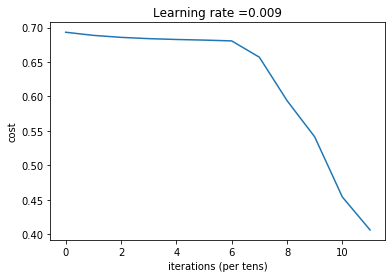

In [72]:
train_x = pd.read_csv("cancer_data.csv")
train_x = np.array(train_x)
train_y = pd.read_csv("cancer_data_y.csv")
train_y = np.array(train_y)
dims = [30, 30, 20, 11, 1]
d = model(train_x.T, train_y.T, dims, print_cost=True)